SSres: 12779.590354193064, SSreg: 3496.71784580695, SStot: 16276.308200000014, R^2: 0.21483482635251078


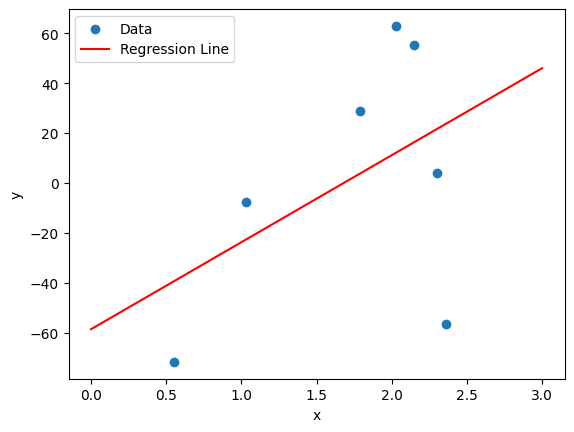

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial


# find sum given an exponent
def findSum(exp, arrX, arrY=None):
    sum = 0
    if arrY is None:
        for i in arrX:
            sum += i**exp
    else:
        for i in range(0, len(arrX)):
            sum += (arrX[i] ** exp) * arrY[i]
    return sum


# find xi^n from 0 to 5 and find the sums of them
def buildSystem(arrX, arrY, n):
    # build the left side of the system
    for i in range(0, n + 1):
        for j in range(i, n + i + 1):
            leftHandSide[i][j - i] = findSum(j, arrX)
    # build the right side of the system
    for i in range(0, n + 1):
        rightHandSide[i][0] = findSum(i, arrX, arrY)


# build a system of equations and solve


# find a least squares polynomial for degree 1, 2, and 3
def rrPlot(x, y, n, leftHandSide, rightHandSide):
    # compute the left and right hand side equations
    buildSystem(x, y, n)
    # now that we have our system, we need to solve for a0 to a(n)
    sol = np.linalg.solve(leftHandSide, rightHandSide)

    # take our solution, turn it into a 1-D array to turn into a polynomial
    temp_y = np.zeros((n + 1))
    for i in range(len(sol)):
        temp_y[i] = sol[i][0]
    y_hat_temp = np.poly1d(temp_y)
    y_hat = np.polynomial.Polynomial(y_hat_temp)
    new_x = np.linspace(0, 3, 100)
    # now we need to find SSres, SSreg, and SStot for the new equation

    residuals = y - y_hat(x)
    SSres = np.sum((residuals) ** 2)
    y_mean = np.mean(y)
    SSreg = np.sum((y_hat(x) - y_mean) ** 2)
    SStot = SSres + SSreg
    rSquared = SSreg / SStot
    print(
        "SSres: "
        + str(SSres)
        + ", SSreg: "
        + str(SSreg)
        + ", SStot: "
        + str(SStot)
        + ", R^2: "
        + str(rSquared)
    )

    # plot the data
    plt.scatter(x, y, label="Data")
    plt.plot(new_x, y_hat(new_x), color="red", label="Regression Line")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()


x = np.array([0.55, 1.03, 1.79, 2.03, 2.15, 2.30, 2.36])
y = np.array([-71.79, -7.5, 28.89, 62.97, 55.43, 4.0, -56.67])
n = 1
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)


SSres: 5120.99708512242, SSreg: 11155.311114878225, SStot: 16276.308200000643, R^2: 0.6853710913926896


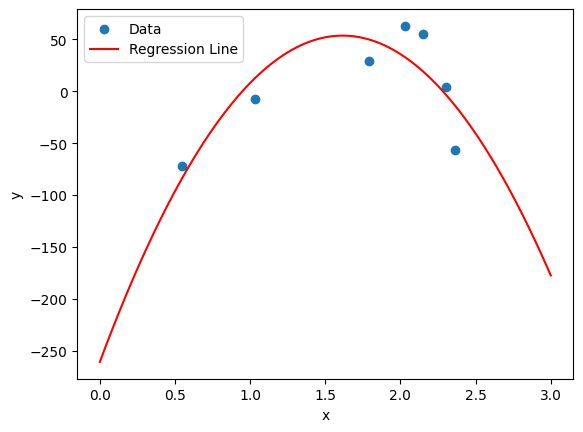

In [15]:
n = 2
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)

SSres: 3072.0069087124757, SSreg: 13204.301291285206, SStot: 16276.308199997682, R^2: 0.8112589863152805


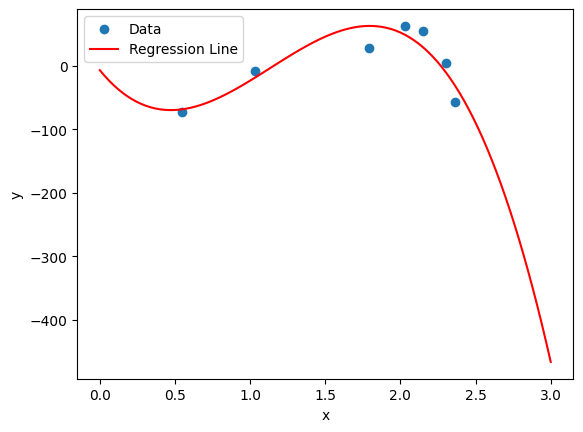

In [16]:
n = 3
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)